# Fit a Poisson curve to heatwave duration data from UKCP

## Data

In [20]:
import pandas as pd

In [103]:
fname = 'data/UKCP/utci_heatstress_ukcp_land-cpm_london.csv'
data = pd.read_csv(fname)
data

,decade,days,count
0,1980s,0,42912
1,1990s,0,42365
2,2000s,0,0
3,2010s,0,0
4,2020s,0,41903
...,...,...,...
305,2030s,30,0
306,2040s,30,0
307,2050s,30,0
308,2060s,30,2


In [116]:
data_decades = {}
for decade in ['1980s', '1990s', '2020s', '2030s', '2060s', '2070s']:
    data_d = data[data.decade==decade]
    data_decades[decade] = np.concatenate([np.ones(row.count)*row.days for row in data_d.itertuples()])

In [117]:
data_decades

{'1980s': array([0., 0., 0., ..., 6., 9., 9.]),
 '1990s': array([0., 0., 0., ..., 8., 8., 9.]),
 '2020s': array([ 0.,  0.,  0., ..., 10., 10., 11.]),
 '2030s': array([ 0.,  0.,  0., ..., 11., 12., 13.]),
 '2060s': array([ 0.,  0.,  0., ..., 25., 30., 30.]),
 '2070s': array([ 0.,  0.,  0., ..., 30., 30., 30.])}

1980s


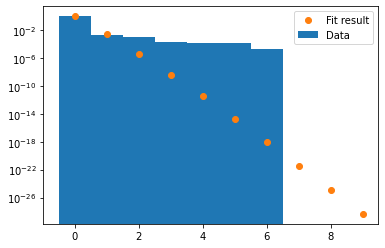

[0.00294602]
1990s


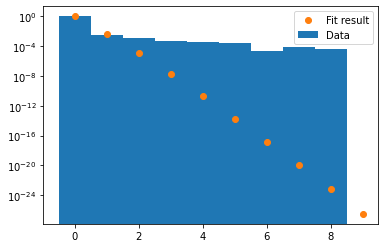

[0.00472702]
2020s


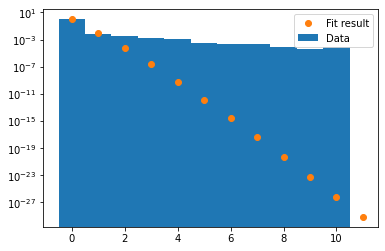

[0.01096962]
2030s


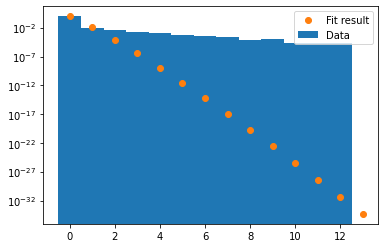

[0.01298498]
2060s


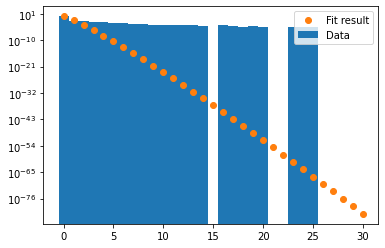

[0.02165348]
2070s


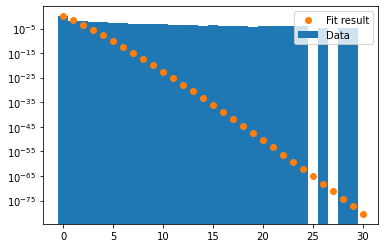

[0.02513711]


In [118]:
for decade in data_decades.keys():
    print(decade)
    fit_poisson(data_decades[decade])

## Let's try `scipy.stats`
#### As per http://danielhnyk.cz/fitting-distribution-histogram-using-python/

In [14]:
from scipy import stats

In [ ]:
stats.poisson.

## Poisson fitting example from
https://stackoverflow.com/questions/25828184/fitting-to-poisson-histogram

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson




def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


def fit_poisson(data):
    # get poisson deviated random numbers
    # data = np.random.poisson(0.1, 1000)
#     data = data_70s_hist
    length=data.max()+1
    # the bins should be of integer width, because poisson is an integer distribution
    bins = np.arange(length) - 0.5
    entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

    # calculate bin centres
    bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # fit with curve_fit
    parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

    # plot poisson-deviation with fitted parameter
    x_plot = np.arange(0, length)

    plt.plot(
        x_plot,
        fit_function(x_plot, *parameters),
        marker='o', linestyle='',
        label='Fit result',
    )
    plt.legend()
    plt.yscale('log')
    plt.show()

    print(parameters)

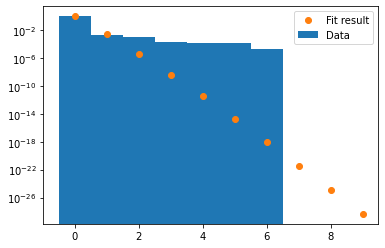

[0.00294602]


In [99]:
fit_poisson(data_80s_hist)

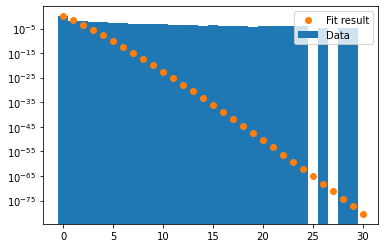

[0.02513711]


In [100]:
fit_poisson(data_70s_hist)

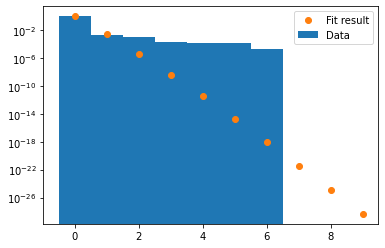

[0.00294602]


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get poisson deviated random numbers
# data = np.random.poisson(0.1, 1000)
data = data_80s_hist

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(10) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 10)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.yscale('log')
plt.show()

print(parameters)

In [94]:
data_80s_hist.max()

9.0

In [91]:
parameters

array([0.02513711])

In [76]:
cov_matrix

array([[1.23488431e-07]])

In [77]:
entries

array([9.96262160e-01, 2.18234161e-03, 9.51872403e-04, 2.32164001e-04,
       1.62514800e-04, 1.39298400e-04, 2.32164001e-05, 0.00000000e+00,
       0.00000000e+00, 4.64328001e-05])

In [78]:
data

array([0., 0., 0., ..., 6., 9., 9.])

   direc: array([[1.]])
     fun: nan
 message: 'NaN result encountered.'
    nfev: 44
     nit: 3
  status: 3
 success: False
       x: array([-0.45099765])


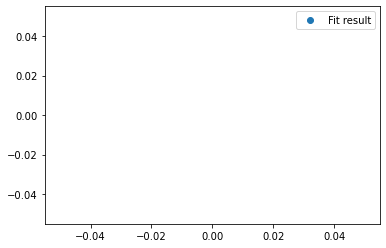

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import factorial
from scipy import stats


def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negative_log_likelihood(params, data):
    """
    The negative log-Likelihood-Function
    """

    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl

def negative_log_likelihood(params, data):
    ''' better alternative using scipy '''
    return -stats.poisson.logpmf(data, params[0]).sum()


# get poisson deviated random numbers
# data = np.random.poisson(3, 1000)
data = data_70s_hist

# minimize the negative log-Likelihood

result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  )
# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print(result)

# plot poisson-distribution with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    stats.poisson.pmf(x_plot, *result.x),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()